# **Analisis Data NYC TLC Trip Record**

## **Latar Belakang**

Transportasi merupakan salah satu aspek penting dalam kehidupan perkotaan, terutama di kota metropolitan seperti New York City yang memiliki tingkat kepadatan dan mobilitas masyarakat yang sangat tinggi. Di antara berbagai moda transportasi, layanan taksi memainkan peran vital dalam menyediakan mobilitas yang cepat, fleksibel, dan tersedia sepanjang waktu, baik bagi penduduk lokal maupun wisatawan.

Namun, seiring dengan meningkatnya populasi, kepadatan lalu lintas, serta munculnya kompetitor dari layanan transportasi berbasis aplikasi (seperti Uber dan Lyft), tantangan dalam pengelolaan transportasi semakin kompleks. Pemerintah Kota New York, melalui lembaga yang berwenang yaitu New York City Taxi and Limousine Commission (TLC), bertanggung jawab untuk mengatur dan mengawasi operasional layanan taksi, termasuk standar pelayanan, tarif, izin operasional, hingga perlindungan konsumen.

Agar kebijakan yang diterapkan oleh TLC bersifat tepat sasaran, inklusif, dan berbasis kebutuhan riil masyarakat, dibutuhkan pemahaman yang komprehensif terhadap karakteristik pengguna dan pola penggunaan layanan taksi. Hal ini penting agar tidak terjadi kesenjangan antara kebijakan yang dibuat dengan kondisi di lapangan.

Oleh karena itu, analisis terhadap data TLC Trip Record menjadi sangat penting sebagai dasar pengambilan kebijakan yang berbasis data guna meningkatkan kualitas pelayanan transportasi taksi yang efisien, adil, dan responsif terhadap kebutuhan masyarakat di New York City.

## **Pernyataan Masalah**

New York City Taxi and Limousine Commission (TLC) memerlukan pemahaman yang akurat mengenai pola penggunaan dan karakteristik pengguna layanan taksi untuk merumuskan kebijakan yang tepat sasaran dan meningkatkan kualitas layanan transportasi taksi di New York City.

Oleh karena itu, analisis ini bertujuan untuk menjawab pertanyaan-pertanyaan berikut:
1. Bagaimana pola penggunaan layanan taksi di New York City berdasarkan waktu dan lokasi? 
2. Bagaimana karakteristik pengguna layanan taksi berdasarkan metode pembayaran, jarak dan durasi perjalanan?
3. Apakah terdapat pola tertentu dalam pemilihan tipe perjalanan berdasarkan jarak perjalanan?

Dari hasil analisis ini, diharapkan dapat:
1. Mengidentifikasi waktu-waktu dengan tingkat penggunaan layanan taksi paling tinggi untuk mengoptimalkan distribusi armada taksi pada jam-jam sibuk.
2. Mengetahui lokasi dengan permintaan layanan taksi paling tinggi untuk mencegah kurangnya armada taksi di lokasi dengan tingkat permintaan taksi paling tinggi.
3. Mengetahui kategori perjalanan yang sering dilakukan sebagai dasar untuk meningkatkan kualitas layanan sesuai dengan preferensi pengguna. 
4. Mengetahui metode pembayaran yang paling banyak digunakan untuk menyesuaikan sistem pembayaran yang tersedia di setiap armada taksi.
5. Mengetahui hubungan antara tipe perjalanan dengan jarak perjalanan yang ditempuh untuk menyesuaikan layanan taksi dengan preferensi pengguna.

## **Dataset yang Digunakan**

Untuk menyelesaikan permasalahan di atas, saya akan melakukan analisis terhadap data New York City TLC Trip Record yang dapat diakses pada tautan berikut : [Link](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N?usp=sharing).

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest, chi2_contingency

Dataset New York City TLC Trip Record merupakan dataset mengenai catatan perjalanan taksi di kota New York yang dikumpulkan oleh Taxi dan Limousine Commission (TLC). Setiap baris berisi data satu perjalanan lengkap dengan informasi mengenai waktu, lokasi, tarif, metode pembayaran, dan lain-lain. Pada dataset tersebut terdapat 20 kolom, antara lain:

| Nama Kolom             | Deskripsi |
|------------------------|-----------|
| VendorID              | Kode yang menunjukkan penyedia LPEP yang menyediakan catatan tersebut. Berikut deskripsi masing-masing kode: <br> 1 = Creative Mobile Technologies, LLC <br> 2 = VeriFone Inc. |
| lpep_pickup_datetime  | Tanggal dan waktu saat argo taksi diaktifkan (waktu penjemputan). |
| lpep_dropoff_datetime | Tanggal dan waktu saat argo taksi dimatikan (waktu penurunan). |
| store_and_fwd_flag    | Penanda apakah catatan perjalanan disimpan sementara karena kendaraan tidak memiliki koneksi ke server. Dimana Y berarti disimpan sementara dan N berarti tidak disimpan sementara. |
| RateCodeID            | Kode tarif akhir yang berlaku pada akhir perjalanan. Berikut deskripsi masing-masing kode: <br> 1 = Standard Rate <br> 2 = JFK <br> 3 = Newark <br> 4 = Nassau atau Westchester <br> 5 = Negotiated fare (Tarif negosiasi) <br> 6 = Group ride (Perjalanan bersama)|
| PULocationID          | Zona Taksi TLC tempat argometer diaktifkan (lokasi penjemputan). |
| DOLocationID          | Zona Taksi TLC tempat argometer dimatikan (lokasi penurunan). |
| passenger_count       | Jumlah penumpang di dalam kendaraan. Nilai ini dimasukkan oleh pengemudi. |
| trip_distance         | Jarak perjalanan yang ditempuh dalam satuan mil yang dilaporkan oleh argometer. |
| fare_amount           | Tarif berdasarkan waktu dan jarak dihitung oleh argometer. Terdapat juga biaya tambahan lainnya, yang saat ini hanya mencakup biaya sebesar $0.50 dan $1 untuk jam sibuk serta perjalanan di malam hari. |
| extra                 | Biaya tambahan yang dikenakan berdasarkan waktu atau situasi tertentu. |
| mta_tax               | Pajak MTA sebesar $0.50 yang otomatis dikenakan berdasarkan tarif argo. |
| tip_amount            | Nilai tip otomatis untuk pembayaran dengan kartu kredit. Tip tunai tidak termasuk. |
| tolls_amount          | Jumlah total semua biaya tol yang dibayarkan dalam perjalanan. |
| ehail_fee             | Biaya pemesanan melalui aplikasi. |
| improvement_surcharge | Biaya tambahan sebesar $0.30 yang mulai diberlakukan sejak tahun 2015. |
| total_amount          | Jumlah total yang dibebankan kepada penumpang. Tidak termasuk tip tunai. |
| payment_type          | Kode numerik yang menunjukkan metode pembayaran yang dilakukan oleh penumpang. Berikut deskripsi masing-masing kode: <br> 1 = Credit Card (Kartu kredit) <br> 2 = Cash (Tunai) <br> 3 = No charge (Tanpa biaya) <br> 4 = Dispute (Sengketa) <br> 5 = Unknown (Tidak diketahui) <br> 6 = Voided trip (Perjalanan dibatalkan) |
| trip_type             | Kode yang menunjukkan apakah perjalanan merupakan hasil hentian langsung di jalan atau pemesanan melalui aplikasi atau panggilan. Berikut deskripsi masing-masing kode: <br> 1 = Street-hail (langsung di jalan) <br> 2 = Dispatch (melalui aplikasi/panggilan) |
| congestion_surcharge  | Jumlah biaya tambahan untuk kemacetan saat perjalanan. |

Berikut 5 baris teratas dari dataset New York City TLC Trip Record.

In [199]:
# Mengimpor dataset dan menampilkan 5 baris teratas
df = pd.read_csv('NYC TLC Trip Record.csv')
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13448\1297434021.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


## **Data Understanding and Cleaning**

Sebelum melakukan analisis, perlu dilakukan pengecekan dan memahami dataset terlebih dahulu. Tujuan dari proses ini adalah untuk memahami setiap nilai pada kolom atau variabel yang ada dalam dataset dan mendeteksi anomali atau kesalahan pada dataset. Setiap anomali atau kesalahan pada dataset nantinya akan dilakukan penanganan untuk mendapatkan hasil analisis yang sesuai dan akurat.

Pertama, melihat informasi umum dari dataset.

In [200]:
# Melihat informasi umum data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [201]:
# Melihat statistik deskriptif dari data
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-07 23:58:06,2023-01-06 00:00:00,N
freq,4,6,63579


In [202]:
# Menampilkan data unik pada setiap kolom
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns = ['Column Name', 'Number of Unique', 'Unique Sample'], data = listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

Secara umum, dapat dilihat bahwa:
- Dataset New York City TLC Trip Record memiliki 68.211 baris dan 20 kolom.
- Terdapat beberapa kolom yang memiliki missing value antara lain `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type`, dan `congestion_surcharge`. Missing value ditandai dengan adanya NaN pada kolom tersebut.
- Terdapat peringatan bahwa kolom `store_and_fwd_flag` memiliki tipe data campuran sehingga perlu dilakukan pengecekan ulang mengenai tipe data pada kolom tersebut.
- Pada kolom `RatecodeID` terdapat nilai 99, sedangkan kode yang digunakan hanya bernilai 1-6 sehingga perlu dilakukan pengecekan ulang apakah terdapat salah input atau kesalahan lain.
- Pada kolom `passenger_count` terdapat nilai 0 dan dapat diasumsikan bahwa driver hanya mengantar barang saja sehingga tidak ada penumpang dalam perjalanan tersebut.
- Pada kolom `trip_distance` memiliki range data yang cukup besar antara 0-12.0098,84. Nilai 0 menandakan bahwa penumpang tidak melakukan perjalanan sama sekali sehingga data tersebut tidak relevan dengan tujuan dari analisis dan dapat dihapus. Kemudian trip_distance lebih dari 100 mil merupakan perjalanan yang tidak biasa sehingga perlu dilakukan pengecekan ulang terhadap data tersebut.
- Terdapat nilai yang negatif (-) pada kolom `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, dan `congestion_surcharge` sehingga perlu dilakukan pengecekan apakah terdapat kesalahan dalam menginput data, terjadi kesalahan selama perjalanan yang menyebabkan harus membayar kerugian atau penumpang mendapatkan diskon tertentu.

### **Missing Value**

In [203]:
# Persentase missing value setiap kolom
(df.isna().sum()/df.shape[0]*100).round(2)

VendorID                   0.00
lpep_pickup_datetime       0.00
lpep_dropoff_datetime      0.00
store_and_fwd_flag         6.34
RatecodeID                 6.34
PULocationID               0.00
DOLocationID               0.00
passenger_count            6.34
trip_distance              0.00
fare_amount                0.00
extra                      0.00
mta_tax                    0.00
tip_amount                 0.00
tolls_amount               0.00
ehail_fee                100.00
improvement_surcharge      0.00
total_amount               0.00
payment_type               6.34
trip_type                  6.35
congestion_surcharge       6.34
dtype: float64

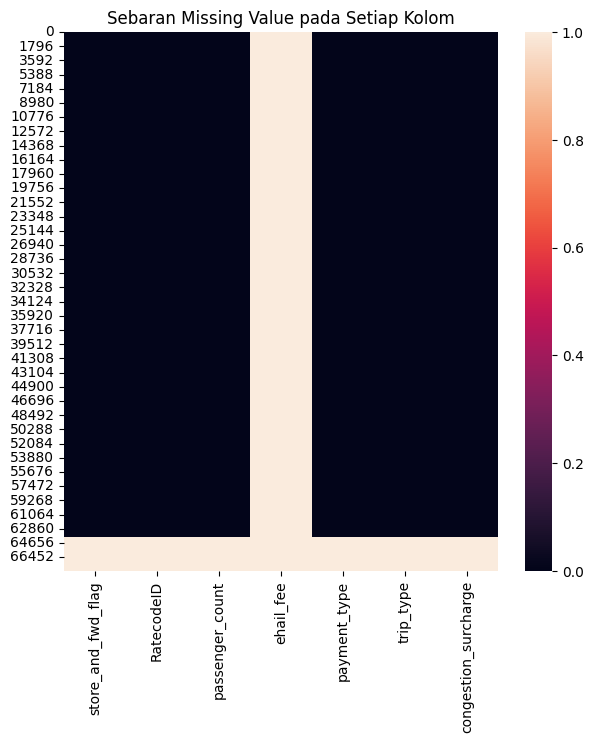

In [204]:
# Sebaran missing value di dalam data
plt.figure(figsize = (7,7))
sns.heatmap(df[['store_and_fwd_flag','RatecodeID','passenger_count','ehail_fee','payment_type','trip_type','congestion_surcharge']].isna())
plt.title('Sebaran Missing Value pada Setiap Kolom', size=12)

plt.show()

Berdasarkan perhitungan persentase missing value dan grafik di atas, dapat diketahui bahwa:
- Pada kolom `ehail_fee` memiliki persentase missing value sebesar 100% yang artinya kolom tersebut tidak memiliki data sama sekali sehingga perlu dilakukan penghapusan kolom.
- Pada kolom `store_and_fwd_flag`, `RatecodeID `, `passenger_count`, `payment_type`, `trip_type`, dan `congestion_surcharge` memiliki persentase missing value yang hampir sama sekitar 6% dan persebaran missing value pada semua kolom sama yaitu pada baris terakhir. Penanganan missing value pada kolom tersebut akan dilakukan penghapusan setiap baris yang memiliki missing value karena proporsi missing value yang cenderung kecil (6%) dan letaknya yang berurutan atau tidak acak.

#### `ehail_fee`

In [205]:
# Menghapus kolom ehail_fee
df.drop(columns = 'ehail_fee', inplace = True)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


#### `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, dan `congestion_surcharge`

Semua nilai missing value pada kolom tersebut dimulai dari baris 63889 kebawah, kecuali pada kolom trip_type terdapat beberapa yang diluar baris tersebut.

In [206]:
# Menghapus baris yang memiliki missing value
df.dropna(inplace = True)

In [207]:
# Mengecek missing value setiap kolom
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

Dari pengecekan tersebut terlihat bahwa sudah tidak ada lagi missing value pada data.

### **Inconsistent Data and Faulty Data**

#### `store_and_fwd_flag`

In [208]:
# Melihat tipe data store_and_fwd_flag
df['store_and_fwd_flag'].apply(type).value_counts()

store_and_fwd_flag
<class 'str'>    63877
Name: count, dtype: int64

Setelah dilakukan pengecekan ulang ternyata semua data pada kolom `store_and_fwd_flag` sudah bertipe string sehingga tidak perlu dilakukan perubahan tipe data.

#### `RatecodeID`

In [209]:
# Mengecek data dengan RatecodeID = 99
df[df['RatecodeID'] == 99].value_counts()

Series([], Name: count, dtype: int64)

Ternyata data dengan nilai `RatecodeID` = 99 memiliki missing value pada kolom `trip_type` sehingga data tersebut juga sudah ikut terhapus. Namun, setelah saya mencari dataset yang sama dari sumber yang lain memang terdapat nilai 99 yang artinya 'Unknown' atau 'Tidak Diketahui'

#### `trip_distance`

Pada kolom `trip_distance` terdapat nilai 0 yang menandakan bahwa penumpang tidak melakukan perjalanan apapun sehingga data tersebut menjadi tidak relevan untuk dilakukan analisis dan bisa dihapus saja.

In [210]:
# Menghapus baris dengan trip_distance = 0
null_distance = df[df['trip_distance'] == 0.0]
df.drop(null_distance.index, inplace = True)

Pada kolom `trip_distance` terdapat nilai yang lebih dari 100 sehingga perlu dilakukan pengecekan ulang apakah terdapat kesalahan pada data tersebut.

In [211]:
# Mengecek data dengan trip_distance > 100
df[df['trip_distance'] > 100]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1.0,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,1.0,1.0,2.75


Masih ada 1 data yang memiliki `trip_distance` lebih dari 100 dan terlihat waktu tempuh untuk jarak 1.571,97 mil adalah 24 menit yang berarti kecepatan rata-rata mobil tersebut sekitar 3.929 mph. Kecepatan tersebut sangat mustahil dilakukan untuk kendaraan seperti taksi sehingga data tersebut menjadi tidak masuk akal dan harus dibuang.

In [212]:
# Menghapus baris dengan trip_distance > 100
df.drop(df[df['trip_distance'] > 100].index, inplace = True)

#### `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, dan `congestion_surcharge`

In [213]:
# Membuat dataframe baru yang berisi nilai negatif (-)
min_col = df[(df['fare_amount'] < 0) | (df['extra'] < 0) | (df['mta_tax'] < 0) | (df['tip_amount'] < 0) | (df['improvement_surcharge'] < 0) | (df['total_amount'] < 0) | (df['congestion_surcharge'] < 0)]
min_col

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4.0,1.0,0.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3.0,1.0,0.0
2481,2,2023-01-02 19:03:48,2023-01-02 19:04:24,N,1.0,130,130,1.0,0.11,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60962,2,2023-01-30 15:57:52,2023-01-30 16:00:00,N,1.0,41,41,1.0,0.37,-4.4,-2.5,-0.5,0.0,0.0,-1.0,-8.4,4.0,1.0,0.0
61102,2,2023-01-30 17:17:09,2023-01-30 17:33:27,N,1.0,260,82,1.0,0.67,-14.2,-2.5,-0.5,0.0,0.0,-1.0,-18.2,3.0,1.0,0.0
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0,0.0
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0


Asumsi awal adanya nilai negatif (-) pada kolom tersebut dikarenakan penumpang mendapatkan diskon/tanpa biaya atau terjadi kesalahan selama perjalanan yang menyebabkan penumpang tidak mau membayar atau driver harus membayar ganti rugi kepada penumpang. Oleh karena itu, akan dilakukan pengecekan terhadap metode pembayaran apakah terdapat kode yang bernilai 2 (Cash), 3 (No charge), 4 (Dispute), atau 6 (Voided trip).

In [214]:
# Melihat payment_type pada data yang negatif
min_col['payment_type'].unique()

array([3., 4., 2.])

Berdasarkan pengecekan tersebut ternyata sesuai dengan asumsi awal bahwa kolom-kolom tersebut bernilai negatif dikarenakan terdapat penumpang yang mendapatkan biaya gratis (No charge) selama perjalanan, kemudian terdapat sengketa dalam pembayaran (Dispute) sehingga penumpang menolak untuk membayar total biaya yang ditetapkan, dan juga ada kejadian yang membuat driver harus membayar kerugian kepada penumpang secara tunai (Cash). 
Baris yang memiliki nilai negatif tersebut akan dihapus dari data karena nilai tersebut tidak masuk akal dan tidak relevan untuk dianalisis.

In [215]:
# Menghapus baris yang bernilai negatif
df.drop(min_col.index, inplace = True)

### **Duplicate Data**

In [216]:
# Mengecek duplicate data
df.duplicated().sum()

np.int64(0)

Berdasarkan hasil pengecekan tersebut didapatkan hasil tidak terdapat data yang duplikat.

## **Transformasi Data**

### **Mengubah Tipe Data**

Pada kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` memiliki tipe data object sedangkan dalam analisis dibutuhkan data bertipe datetime untuk melakukan analisis berdasarkan waktu sehingga perlu mengubah tipe data pada kolom tersebut menjadi datetime.

In [217]:
# Mengubah tipe data menajdi datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

### **Menambah Kolom Baru**

#### `PULocationName`

Kolom `PULocationName` akan berisi nama lokasi penjemputan berdasarkan kolom `PULocationID` yang berguna untuk melihat nama lokasi penjemputan. Data nama lokasi berdasarkan ID dapat diakses pada tautan berikut : [Link](https://www.kaggle.com/datasets/shuhengmo/uber-nyc-forhire-vehicles-trip-data-2021?select=taxi_zone_lookup.csv).

In [218]:
# Mengimpor dan mengambil data nama lokasi
zone = pd.read_csv('taxi_zone_lookup_coordinates.csv')
zone_id = zone[['LocationID', 'Zone']]

# Menggabungkan nama lokasi dengan PULocationID
df = pd.merge(df, zone_id, left_on = 'PULocationID', right_on = 'LocationID', how = 'left')
df.rename(columns = {'Zone': 'PULocationName'}, inplace = True)
df.drop(columns = 'LocationID', inplace = True)

#### `DOLocationName`

Kolom `DOLocationName` akan berisi nama lokasi penurunan berdasarkan kolom `DOLocationID` yang berguna untuk melihat nama lokasi penurunan.

In [219]:
# Menggabungkan nama lokasi dengan DOLocationID
df = pd.merge(df, zone_id, left_on = 'DOLocationID', right_on = 'LocationID', how = 'left')
df.rename(columns = {'Zone': 'DOLocationName'}, inplace = True)
df.drop(columns = 'LocationID', inplace = True)

#### `day_name`

Kolom `day_name` akan berisi nama-nama hari dari Sunday-Saturday yang nantinya akan digunakan untuk melihat pola penggunaan layanan taksi berdasarkan hari.

In [220]:
# Membuat kolom day_name
df['day_name'] = df['lpep_pickup_datetime'].dt.day_name()

#### `day_category`

Kolom `day_category` akan berisi nama kategori weekday dan weekend berdasarkan kolom `day_name` yang nantinya akan digunakan untuk melihat pola penggunaan layanan taksi berdasarkan kategori hari.

In [221]:
# Membuat fungsi kategori hari
def category_day(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 'Weekday'
    else:
        return 'Weekend'

# Membuat kolom day_category 
df['day_category'] = df['day_name'].apply(category_day)

#### `trip_route`

Kolom `trip_route` akan berisi rute perjalanan pengguna yang diambil dari kolom `PULocationName` dan `DOLocationName` yang nantinya digunakan untuk melihat rute perjalanan yang sering dilalui.

In [222]:
# Membuat kolom trip_route
df['trip_route'] = df['PULocationName'].astype(str) + ' - ' + df['DOLocationName'].astype(str)

#### `trip_duration`

Kolom `trip_duration` akan berisi durasi perjalanan yang dilakukan dan diambil dari pengurangan kolom `lpep_dropoff_datetime` dengan `lpep_pickup_datetime` yang nantinya akan digunakan untuk melihat durasi perjalanan yang dilakukan oleh pengguna.

In [223]:
# Membuat kolom trip_duration
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()
df['trip_duration'].describe()

count    60574.000000
mean      1079.850051
std       4671.103291
min          0.000000
25%        435.000000
50%        669.000000
75%       1004.000000
max      86336.000000
Name: trip_duration, dtype: float64

Berdasarkan hasil perhitungan tersebut, terlihat bahwa durasi perjalanan memiliki rentang nilai dari 0-86.336 detik (24 jam). Nilai 0 tidak masuk akal karena durasi perjalanan 0 detik menandakan bahwa pengguna tidak melakukan perjalanan apapun. Oleh karena itu, baris yang memiliki durasi perjalanan 0 detik akan dihapus karena tidak relevan dan nilai tersebut kemungkinan terjadi karena ada salah pencatatan pada sistem atau driver.

In [224]:
# Menghapus baris dengan trip_duration = 0
df.drop(df[df['trip_duration'] == 0].index, inplace = True)

#### `avg_speed`

Kolom `avg_speed` akan berisi kecepatan rata-rata taksi dalam perjalanan dan diambil dari pembagian kolom `trip_distance` dengan `trip_duration` yang akan digunakan untuk melihat kecepatan rata-rata taksi. Kolom ini berguna untuk memvalidasi data perjalanan dengan asumsi kecepatan rata-rata transportasi umum seperti taksi berkisar antara 5-40 mph atau 8-64 km/jam.

In [225]:
# Membuat kolom avg_speed
df['avg_speed'] = (df['trip_distance'] / (df['trip_duration'] / 3600)).round(2)
df['avg_speed'].describe()

count    60570.000000
mean        14.242448
std        106.638263
min          0.000000
25%          8.480000
50%         10.570000
75%         13.600000
max      11700.000000
Name: avg_speed, dtype: float64

Berdasarkan hasil perhitungan, terlihat bahwa kecepatan rata-rata taksi memiliki rentang 0-11.700 mph. Sesuai dengan asumsi di awal tadi bahwa kecepatan rata-rata taksi berkisar antara 5-40 mph, maka nilai yang berada diluar rentang tersebut dapat dihapus karena tidak relevan.

In [226]:
# Menghapus baris dengan avg_speed < 5 dan avg_speed > 40
df.drop(df[(df['avg_speed'] < 5) | (df['avg_speed'] > 40)].index, inplace = True)

#### `duration_category`

Kolom `duration_category` akan berisi kategori lama perjalanan yang dilakukan berdasarkan kolom `trip_duration` yang nantinya akan digunakan untuk melihat kategori lama perjalanan yang dilakukan oleh pengguna.

Terdapat 3 kategori yang akan dibuat antara lain:
- Sebentar : Durasi perjalanan kurang dari sama dengan 600 detik (≤ 10 menit)
- Sedang : Durasi perjalanan antara 601-1.200 detik (10-20 menit)
- Lama : Durasi perjalanan lebih dari 1.200 detik (> 20 menit)

In [227]:
# Membuat fungsi kategori durasi perjalanan
def category_trip_duration(duration):
    if duration <= 600:
        return 'Sebentar'
    elif duration <= 1200:
        return 'Sedang'
    else:
        return 'Lama'

# Membuat kolom duration_category    
df['duration_category'] = df['trip_duration'].apply(category_trip_duration)

#### `distance_category`

Kolom `distance_category` akan berisi kategori jarak perjalanan yang dilakukan berdasarkan kolom `trip_distance` yang nantinya akan digunakan untuk melihat kategori jarak perjalanan yang dilakukan oleh pengguna.

Terdapat 3 kategori yang akan dibuat antara lain:
- Dekat : Jarak perjalanan kurang dari sama dengan 2 mil (≤ 2 mil)
- Sedang : Jarak perjalanan antara 2 sampai 5 mil (2-5 mil)
- Jauh : Jarak perjalanan lebih dari 5 mil (> 5 mil)

In [228]:
# Membuat fungsi kategori jarak perjalanan
def category_trip_distance(distance):
    if distance <= 2:
        return 'Dekat'
    elif distance <= 5:
        return 'Sedang'
    else:
        return 'Jauh'

# Membuat kolom distance_category
df['distance_category'] = df['trip_distance'].apply(category_trip_distance)

### **Mengubah Format Dataset**

#### `payment_type`

Kolom `payment_type` berisi kode numerik yang menunjukkan metode pembayaran dan akan diubah menjadi label keterangan yang sesuai untuk mempermudah interpretasi dan analisis data.

In [229]:
# Mengubah kode payment_type dengan keterangan yang sesuai
df['payment_type'] = df['payment_type'].replace({1:'Credit Card', 2:'Cash', 3:'No Charge', 4:'Dispute', 5:'Unknown', 6:'Voided Trip'})

#### `trip_type`

Kolom `trip_type` berisi kode numerik yang menunjukkan tipe perjalanan dan akan diubah menjadi label keterangan yang sesuai untuk mempermudah interpretasi dan analisis data.

In [230]:
# Mengubah kode trip_type dengan keterangan yang sesuai
df['trip_type'] = df['trip_type'].replace({1:'Street-hail', 2:'Dispatch'})

## **Data yang Sudah Bersih**

In [231]:
# Menampilkan data unik pada setiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns = ['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'], data = listItem)
print(df.shape)
dfDesc

(58603, 28)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[1, 2]"
1,lpep_pickup_datetime,datetime64[ns],0,57742,"[2023-01-10T21:12:08.000000000, 2023-01-27T15:52:35.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,57701,"[2023-01-28T21:11:23.000000000, 2023-01-12T00:14:43.000000000]"
3,store_and_fwd_flag,object,0,2,"[Y, N]"
4,RatecodeID,float64,0,5,"[4.0, 2.0]"
5,PULocationID,int64,0,183,"[108, 42]"
6,DOLocationID,int64,0,245,"[171, 106]"
7,passenger_count,float64,0,8,"[7.0, 5.0]"
8,trip_distance,float64,0,1684,"[8.87, 18.31]"
9,fare_amount,float64,0,329,"[28.5, 96.8]"


Sebelum dilakukan cleaning data, data memiliki 68.211 baris dan 20 kolom, sekarang data memiliki 58.603 baris dan 28 kolom. Terdapat sekitar 9.600 baris atau sekitar 14% data yang kosong dan tidak relevan sudah dihapus serta menghapus 1 kolom dan menambah 9 kolom baru.

## **Data Analysis**

Setelah melakukan proses cleaning data, selanjutnya yaitu melakukan analisis untuk mencari tahu **bagaimana pola penggunaan dan karakteristik pengguna layanan taksi?**. Analisis akan dilakukan dengan mencari pola penggunaan layanan taksi berdasarkan waktu dan lokasi, serta menemukan karakteristik pelanggan berdasarkan jarak dan durasi perjalanan, metode pembayaran, dan tipe perjalanan.

### **Analisis Pola Waktu Penggunaan**

Analisis pertama yaitu mencari pola penggunaan layanan taksi berdasarkan waktu seperti jam dan hari menggunakan kolom `lpep_pickup_datetime`, `day_category` dan `day_name` sebagai dasar analisis untuk menjawab beberapa pertanyaan berikut:
1. Pada jam berapa jumlah perjalanan paling banyak terjadi?
2. Apakah terdapat perbedaan jumlah perjalanan berdasarkan hari?
3. Apakah terdapat perbedaan rata-rata jumlah perjalanan antara hari kerja dan akhir pekan?

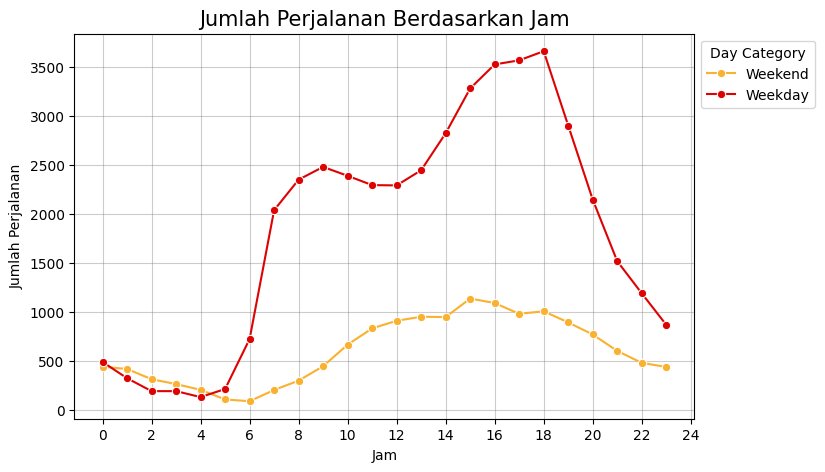

In [251]:
# Line chart jumlah perjalanan per jam
plt.figure(figsize=(8,5))
sns.lineplot(x=df['lpep_pickup_datetime'].dt.hour, y=df['VendorID'], hue=df['day_category'], palette=['#FAB12F', '#DD0303'], marker='o', estimator='count', errorbar=None)
plt.title('Jumlah Perjalanan Berdasarkan Jam', size=15)
plt.xticks(range(0,25,2))
plt.xlabel('Jam')
plt.ylabel('Jumlah Perjalanan')
plt.grid(True, color='gray', alpha=0.4)
plt.legend(title = 'Day Category', loc = 'upper left', bbox_to_anchor = (1,1))

plt.show()

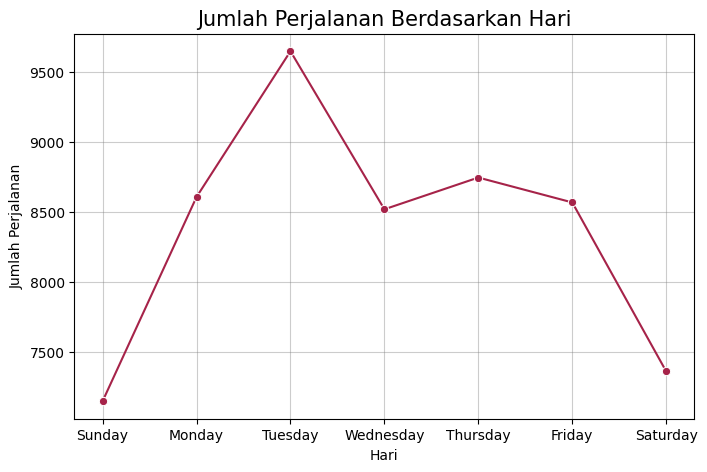

In [252]:
# Mengurutkan hari
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
trip_day = df['day_name'].value_counts().reindex(day_order)

# Line chart jumlah perjalanan per hari
plt.figure(figsize=(8,5))
sns.lineplot(x=trip_day.index, y=trip_day.values, marker='o', color='#A62349')
plt.title('Jumlah Perjalanan Berdasarkan Hari', size=15)
plt.xlabel('Hari')
plt.ylabel('Jumlah Perjalanan')
plt.grid(True, color='gray', alpha=0.4)

plt.show()

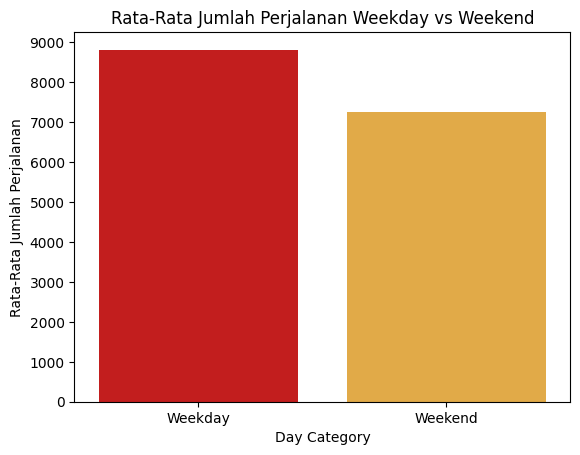

In [253]:
# Memisahkan weekday dan weekend
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday', 'Sunday']

# Menghitung rata-rata trip per hari untuk weekday dan weekend
avg_weekday = trip_day[weekday].mean()
avg_weekend = trip_day[weekend].mean()

# Menggabungkan untuk visualisasi
avg_compare = pd.Series({'Weekday': avg_weekday, 'Weekend': avg_weekend})
avg_compare = avg_compare.reset_index()
avg_compare.columns = ['day_type', 'avg_trips']

# Barplot rata-rata perjalanan weekday vs weekend
plt.figure()
sns.barplot(x=avg_compare['day_type'], y=avg_compare['avg_trips'], hue=avg_compare['day_type'], palette=['#DD0303', '#FAB12F'])
plt.title('Rata-Rata Jumlah Perjalanan Weekday vs Weekend')
plt.xlabel('Day Category')
plt.yticks(range(0,10000,1000))
plt.ylabel('Rata-Rata Jumlah Perjalanan')

plt.show()

Berdasarkan grafik-grafik di atas, dapat menjawab beberapa pertanyaan sebelumnya:
1. Pada jam berapa jumlah perjalanan paling banyak terjadi?
    - Terdapat perbedaan pola penggunaan layanan taksi antara hari kerja dan akhir pekan. Pada hari kerja, jumlah perjalanan paling banyak terjadi pada waktu sore hari sekitar jam 17-18, sedangkan pada akhir pekan jumlah perjalanan paling banyak juga terjadi pada sore hari sekitar jam 15-16.
2. Apakah terdapat perbedaan jumlah perjalanan berdasarkan hari?
    - Terdapat perbedaan jumlah perjalanan berdasarkan hari, yang dimana jumlah perjalanan paling sedikit terjadi pada hari Minggu dan jumlah perjalanan paling banyak terjadi pada hari Selasa. 
3. Apakah terdapat perbedaan rata-rata jumlah perjalanan antara hari kerja dan akhir pekan?
    - Terdapat perbedaan rata-rata jumlah perjalanan yang cukup signifikan antara hari kerja dan akhir pekan. Pada hari kerja rata-rata jumlah perjalanan cenderung lebih banyak dibandingkan akhir pekan.

Dari analisis tersebut, dapat dilihat bahwa pengguna lebih banyak menggunakan taksi pada waktu sore hari dan pengguna cenderung banyak menggunakan taksi pada hari kerja dibandingkan akhir pekan. Pada hari kerja pengguna lebih banyak menggunakan taksi pada jam 17-18, sedangkan pada akhir pekan pengguna lebih banyak menggunakan taksi pada jam 15-16.

### **Analisis Pola Lokasi**

Analisis selanjutnya yaitu mencari pola penggunaan layanan taksi berdasarkan lokasi menggunakan kolom `PULocationName`, `DOLocationName`, dan `trip_route` sebagai dasar analisis untuk menjawab beberapa pertanyaan berikut:
1. Dimana lokasi yang paling sering menjadi titik penjemputan dan titik penurunan?
2. Rute perjalanan mana yang paling populer?

,PULocationName,count
0,East Harlem North,12464
1,East Harlem South,8462
2,Central Harlem,3577
3,Forest Hills,3532
4,Morningside Heights,3530
5,Central Park,2774
6,Elmhurst,2660
7,Fort Greene,1923
8,Astoria,1591
9,Washington Heights South,1582


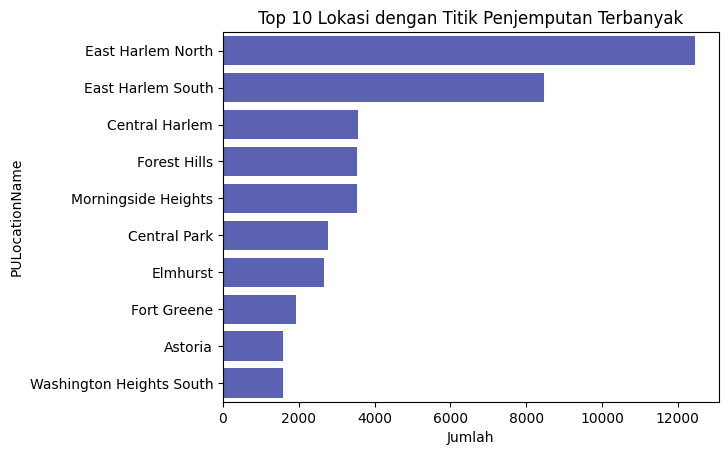

In [254]:
# 10 lokasi yang paling sering menjadi titik penjemputan
top_pickup = df['PULocationName'].value_counts().head(10).reset_index()
display(top_pickup)

# Barplot lokasi titik penjemputan
plt.figure()
sns.barplot(y=top_pickup['PULocationName'], x=top_pickup['count'], color='#4E56C0')
plt.title('Top 10 Lokasi dengan Titik Penjemputan Terbanyak')
plt.xlabel('Jumlah')

plt.show()

,DOLocationName,count
0,East Harlem South,3156
1,East Harlem North,3082
2,Upper East Side North,2558
3,Central Harlem,2421
4,Upper West Side North,2203
5,Central Harlem North,2127
6,Morningside Heights,2120
7,Yorkville West,1455
8,Forest Hills,1413
9,Upper West Side South,1381


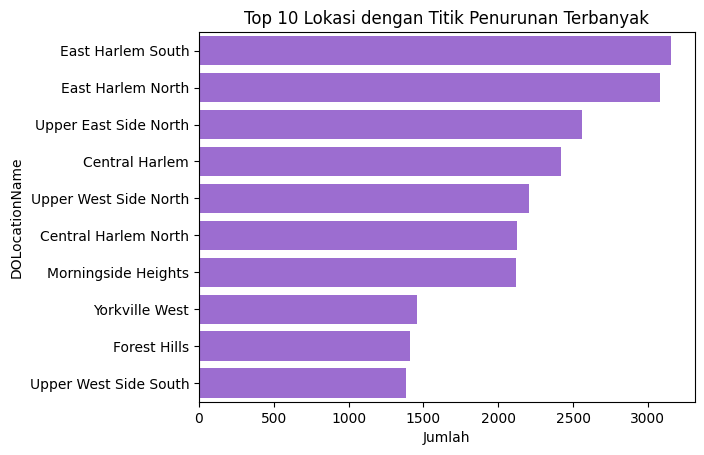

In [255]:
# 10 lokasi yang paling sering menjadi titik penurunan
top_dropoff = df['DOLocationName'].value_counts().head(10).reset_index()
display(top_dropoff)

# Barplot lokasi titik penurunan
plt.figure()
sns.barplot(y=top_dropoff['DOLocationName'], x=top_dropoff['count'], color='#9B5DE0')
plt.title('Top 10 Lokasi dengan Titik Penurunan Terbanyak')
plt.xlabel('Jumlah')

plt.show()

,trip_route,count
0,East Harlem North - East Harlem South,1890
1,East Harlem South - East Harlem North,1409
2,East Harlem North - Upper East Side North,1142
3,Forest Hills - Forest Hills,1042
4,East Harlem North - Central Harlem,927
5,East Harlem North - Morningside Heights,916
6,East Harlem North - Central Harlem North,708
7,East Harlem North - Upper West Side North,680
8,East Harlem North - Yorkville West,658
9,East Harlem North - East Harlem North,648


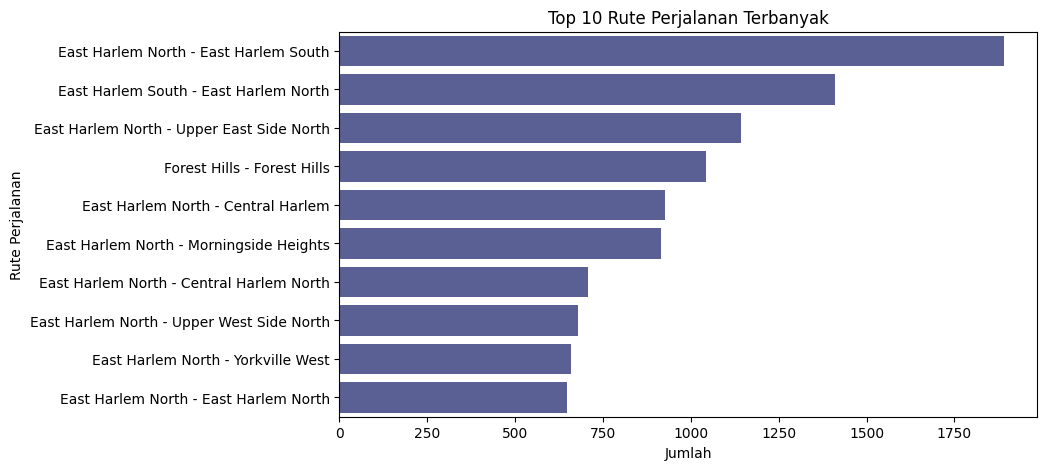

In [256]:
# 10 rute perjalanan yang paling populer
top_route = df['trip_route'].value_counts().head(10).reset_index()
display(top_route)

# Barplot rute perjalanan
plt.figure(figsize=(9,5))
sns.barplot(y=top_route['trip_route'], x=top_route['count'], color='#50589C')
plt.title('Top 10 Rute Perjalanan Terbanyak')
plt.xlabel('Jumlah')
plt.ylabel('Rute Perjalanan')

plt.show()

Berdasarkan tabel dan grafik di atas, kita dapat menjawab pertanyaan sebelumnya:
1. Dimana lokasi yang paling sering menjadi titik penjemputan dan titik penurunan?
    - East Harlem North menjadi lokasi dengan jumlah titik penjemputan paling banyak dan East Harlem South menjadi lokasi dengan jumlah titik penurunan paling banyak.
2. Rute perjalanan mana yang paling populer?
    - Rute perjalanan yang paling populer adalah East Harlem North-East Harlem South yang artinya banyak pengguna yang memakai layanan taksi untuk perjalanan dari East Harlem North ke East Harlem South.

Secara keseluruhan, dapat dikatakan bahwa pengguna layanan taksi lebih banyak pada East Harlem North dan East Harlem South karena kedua lokasi tersebut memiliki titik penjemputan dan titik penurunan paling banyak serta menjadi rute perjalanan yang paling populer. Setelah mencari dari sumber yang lain, kedua lokasi tersebut termasuk dalam wilayah padat penduduk, memiliki akses transportasi publik yang terbatas di beberapa titik, dan menjadi zona peralihan atau transit dalam mobilitas harian warga New York sehingga masuk akal jika banyak pengguna yang menggunakan taksi sebagai pilihan transportasi.

### **Analisis Jarak dan Durasi Perjalanan**

Analisis selanjutnya yaitu mencari karakteristik pengguna dalam memakai layanan taksi berdasarkan jarak dan durasi perjalanan menggunakan kolom `distance_category`, `duration_category`, dan `total_amount` sebagai dasar analisis untuk menjawab beberapa pertanyaan berikut:
1. Apakah pengguna lebih suka menggunakan taksi untuk perjalanan dekat atau jauh?
2. Apakah pengguna lebih suka menggunakan taksi untuk durasi perjalanan lama atau sebentar?
3. Apakah terdapat hubungan antara jarak perjalanan dengan total biaya yang harus dibayar?

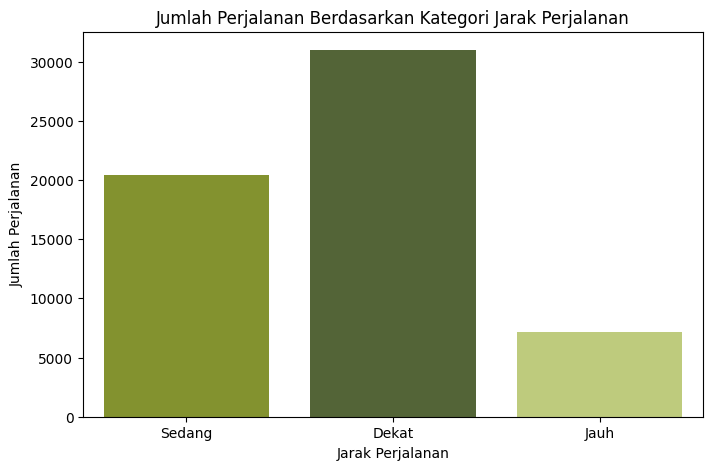

In [257]:
# Barplot kategori jarak perjalanan
plt.figure(figsize=(8,5))
sns.countplot(x=df['distance_category'], hue=df['distance_category'], palette=['#8FA31E', '#556B2F', '#C6D870'])
plt.title('Jumlah Perjalanan Berdasarkan Kategori Jarak Perjalanan')
plt.xlabel('Jarak Perjalanan')
plt.ylabel('Jumlah Perjalanan')

plt.show()

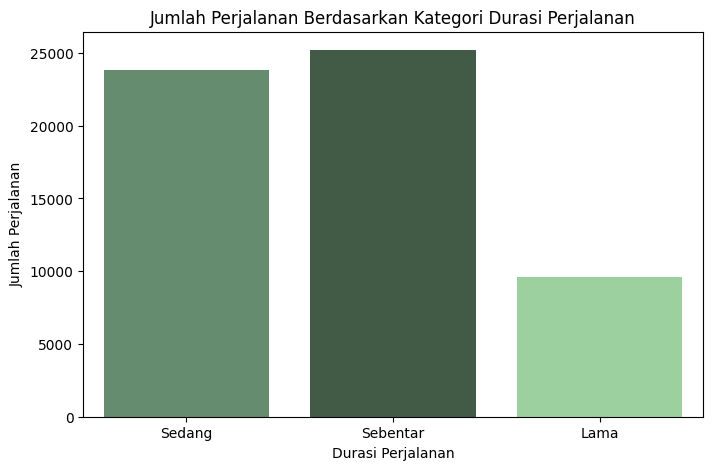

In [258]:
# Barplot kategori durasi perjalanan
plt.figure(figsize=(8,5))
sns.countplot(x=df['duration_category'], hue=df['duration_category'], palette=['#5E936C', '#3E5F44', '#93DA97'])
plt.title('Jumlah Perjalanan Berdasarkan Kategori Durasi Perjalanan')
plt.xlabel('Durasi Perjalanan')
plt.ylabel('Jumlah Perjalanan')

plt.show()

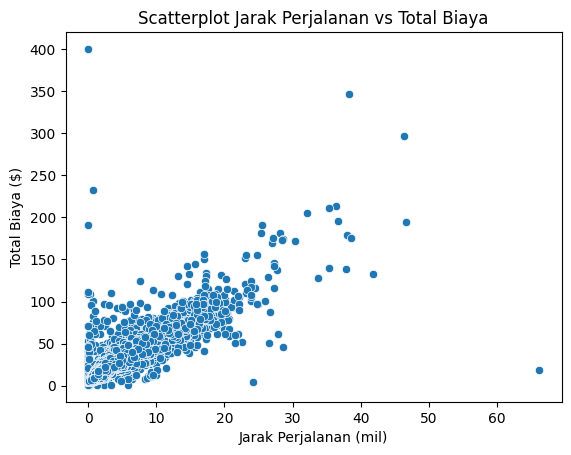

In [240]:
# Mengambil data dengan total_amount > 0
payment = df[df['total_amount'] > 0]

# Scatterplot antara jarak perjalanan dengan total biaya
sns.scatterplot(x=payment['trip_distance'], y=payment['total_amount'])
plt.title('Scatterplot Jarak Perjalanan vs Total Biaya')
plt.xlabel('Jarak Perjalanan (mil)')
plt.ylabel('Total Biaya ($)')

plt.show()

Berdasarkan scatterplot tersebut terlihat bahwa plot-plot membentuk sebuah garis linear positif yang artinya semakin jauh jarak perjalanan maka semakin mahal biaya yang harus dibayarkan. Untuk menguji seberapa kuat hubungan antara kedua variabel tersebut maka akan dilakukan uji korelasi, namun sebelumnya akan dilakukan pengecekan normalitas data untuk menentukan uji korelasi apa yang cocok digunakan.

In [241]:
# Uji normalitas data
for col in ['trip_distance', 'total_amount']:
    stat, pval = normaltest(df[col])

    print(f"Nilai p-value : {pval}")
    if pval > 0.05:
        print(f"Data {col} berdistribusi normal\n")
    else:
        print(f"Data {col} tidak berdistribusi normal\n")

Nilai p-value : 0.0
Data trip_distance tidak berdistribusi normal

Nilai p-value : 0.0
Data total_amount tidak berdistribusi normal



In [242]:
# Menghitung nilai korelasi
df['trip_distance'].corr(df['total_amount'], method = 'spearman')

np.float64(0.9022258058293173)

Berdasarkan grafik-grafik di atas, kita dapat menjawab pertanyaan sebelumnya:
1. Apakah pengguna lebih suka menggunakan taksi untuk perjalanan dekat atau jauh?
    - Pengguna lebih suka menggunakan taksi untuk perjalanan dekat dibandingkan perjalanan sedang atau jauh. Hal tersebut terlihat pada grafik yang menunjukkan perbedaan yang cukup signifikan antara jumlah perjalanan dekat dengan sedang dan jauh.
2. Apakah pengguna lebih suka menggunakan taksi untuk durasi perjalanan lama atau sebentar?
    - Pengguna lebih suka menggunakan taksi untuk durasi perjalanan yang sebentar dibandingkan sedang atau lama. Hal ini terlihat pada grafik yang menunjukkan jumlah perjalanan sebentar lebih banyak dibandingkan sedang atau lama, meskipun perbedaan jumlah perjalanan antara perjalanan sebentar dengan sedang sangat sedikit.
3. Apakah terdapat hubungan antara jarak perjalanan dengan total biaya yang harus dibayar?
    - Terdapat hubungan antara jarak perjalanan dengan total biaya yang ditunjukkan dengan nilai korelasi sebesar 0,9. Nilai tersebut menunjukkan korelasi positif kuat yang artinya semakin jauh jarak perjalanan maka semakin mahal biaya yang harus dibayar oleh penumpang.

Dari analisis tersebut, dapat dilihat bahwa pengguna lebih suka menggunakan taksi untuk perjalanan dekat dan sebentar yaitu perjalanan dengan jarak ≤ 2 mil dan durasi perjalanan ≤ 10 menit. Kemudian, semakin jauh jarak perjalanan maka semakin mahal total biaya yang dikeluarkan.

### **Analisis Metode Pembayaran**

Selanjutnya yaitu menganalisis karakteristik pengguna dalam memakai layanan taksi berdasarkan metode pembayaran yang digunakan untuk mencari tahu metode pembayaran apa yang lebih disukai pengguna saat menggunakan taksi.

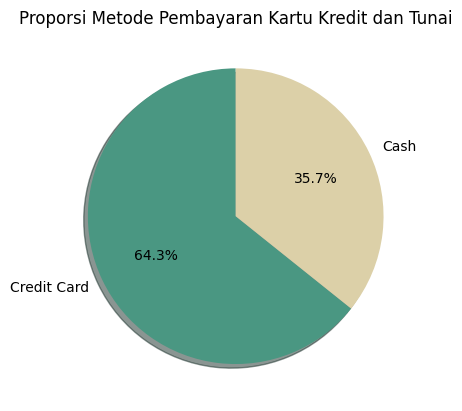

In [243]:
# Mengambil data yang menggunakan metode pembayaran kartu kredit dan tunai
credit_cash = df[df['payment_type'].isin(['Credit Card', 'Cash'])]
credit_cash = credit_cash['payment_type'].value_counts().reset_index()

# Pie chart credit card vs cash
plt.pie(x=credit_cash['count'], labels=credit_cash['payment_type'], colors=['#4A9782', '#DCD0A8'], autopct = '%.1f%%', startangle=90, shadow=True)
plt.title('Proporsi Metode Pembayaran Kartu Kredit dan Tunai')

plt.show()

Dari grafik tersebut, terlihat bahwa persentase penggunaan kartu kredit lebih besar yaitu sekitar 64,3% dibandingkan tunai yang hanya sekitar 35,7%. Hal tersebut menunjukkan bahwa mayoritas pengguna layanan taksi lebih suka menggunakan metode pembayaran dengan kartu kredit dibandingkan tunai.

### **Hubungan Tipe Perjalanan dan Jarak Perjalanan**

Selanjutnya yaitu menganalisis karakteristik pengguna dalam memesan layanan taksi berdasarkan jarak perjalanan menggunakan kolom `trip_type` dan `distance_category`. Analisis ini bertujuan untuk mengetahui apakah terdapat pola tertentu dalam pemilihan tipe perjalanan berdasarkan jarak perjalanan.

In [244]:
# Menghitung jumlah perjalanan pada masing-masing trip_type
df['trip_type'].value_counts().reset_index()

,trip_type,count
0,Street-hail,57938
1,Dispatch,665


In [245]:
# Menghitung proporsi jumlah perjalanan pada masing-masing trip_type
(pd.crosstab(df['trip_type'], df['distance_category'], normalize = 'index') * 100).round(1)

distance_category,Dekat,Jauh,Sedang
trip_type,,,
Dispatch,37.9,34.0,28.1
Street-hail,53.0,12.0,34.9


**Uji Hipotesis Chi Square**

- H0 : Tidak ada hubungan antara tipe perjalanan dan kategori perjalanan
- H1 : Terdapat hubungan antara tipe perjalanan dan kategori perjalanan

In [246]:
# Melakukan uji chi square
ct = pd.crosstab(df['trip_type'], df['distance_category'])

stat, pval, dof, ef = chi2_contingency(ct)

print(f'Nilai p-value : {pval}')
if pval < 0.05:
    print('Tolak H0, sehingga terdapat hubungan antara tipe perjalanan dan kategori perjalanan')
else:
    print('Gagal Tolak H0, sehingga tidak terdapat hubungan antara tipe perjalanan dan kategori perjalanan')

Nilai p-value : 4.894936812321293e-65
Tolak H0, sehingga terdapat hubungan antara tipe perjalanan dan kategori perjalanan


Berdasarkan tabel, terlihat bahwa pengguna lebih banyak memesan layanan taksi dengan memberhentikan langsung di jalan (Street-hail) dibandingkan melalui aplikasi (Dispatch). Secara proporsi tipe perjalanan Street-hail lebih banyak dilakukan untuk perjalanan dekat sekitar 53%, namun proporsi untuk perjalanan sedang juga lumayan besar sekitar 34,9%. Tipe perjalanan Dispatch juga lebih banyak dilakukan untuk perjalanan dekat sekitar 37,9%, tapi proporsi untuk perjalanan jauh juga besar sekitar 34%. Kemudian berdasarkan uji *chi square* diperoleh hasil bahwa terdapat hubungan antara tipe perjalanan dan kategori perjalanan yang menguatkan bukti bahwa tipe perjalanan berpengaruh terhadap jarak perjalanan.

## **Kesimpulan dan Rekomendasi**

### **Kesimpulan**

Berdasarkan hasil analisis yang sudah dilakukan, diperoleh beberapa kesimpulan antara lain:
1. Pengguna lebih banyak menggunakan taksi pada waktu sore hari sekitar jam 17-18 pada hari kerja, sedangkan pada akhir pekan pengguna lebih banyak menggunakan taksi pada jam 15-16. Informasi tersebut menunjukkan bahwa kemungkinan besar pengguna merupakan orang-orang yang pulang kerja, sekolah atau beraktivitas lain. Selain itu, rata-rata jumlah perjalanan yang lebih banyak pada hari kerja menunjukkan bahwa penggunaan taksi lebih banyak untuk kebutuhan transportasi sehari-hari dibandingkan untuk rekreasi.
2. East Harlem North dan East Harlem South merupakan lokasi dengan jumlah perjalanan paling tinggi dan menjadi rute perjalanan paling populer. Kedua lokasi tersebut termasuk dalam wilayah padat penduduk dan menjadi zona peralihan atau transit dalam mobilitas harian warga New York.
3. Pengguna cenderung menggunakan layanan taksi untuk perjalanan jarak dekat dan berdurasi singkat, yaitu ≤ 2 mil dan ≤ 10 menit. Biaya perjalanan yang tinggi untuk jarak jauh kemungkinan menjadi faktor pembatas, sehingga taksi lebih disukai untuk perjalanan pendek.
4. Mayoritas pengguna layanan taksi lebih suka menggunakan metode pembayaran dengan kartu kredit dibandingkan tunai.
5. Terdapat hubungan yang signifikan antara tipe perjalanan dan jarak perjalanan. Pengguna lebih cenderung memilih tipe Street-hail untuk perjalanan jarak dekat dan sedang, sedangkan tipe Dispatch lebih sering digunakan untuk perjalanan jarak dekat dan jauh. Informasi tersebut menunjukkan bahwa kemungkinan tipe Dispatch lebih banyak digunakan untuk perjalanan yang bersifat terencana atau pada lokasi yang jarang ditemukan taksi.

### **Rekomendasi**

Berdasarkan kesimpulan di atas, saran yang dapat saya berikan untuk New York City Taxi and Limousine Commission (TLC) antara lain:
1. TLC dapat meningkatkan jumlah armada taksi pada waktu dengan tingkat permintaan tinggi yaitu sekitar jam 17-18 pada hari kerja saat banyak orang pulang kerja atau sekolah. Hal itu bertujuan agar pengguna tidak kesulitan dalam mendapatkan taksi dan membuat waktu tunggu menjadi lebih singkat.
2. TLC juga dapat menambah jumlah armada taksi pada lokasi dengan tingkat kepadatan penduduk tinggi dan aktivitas tinggi seperti pada East Harlem North dan East Harlem South.
3. TLC harus selalu memperhatikan dan menjaga kelancaran lalu lintas terutama pada East Harlem North dan East Harlem South, dikarenakan lokasi tersebut merupakan area yang paling sering dilalui taksi.
4. Berikan diskon atau voucher khusus bagi pengguna yang melakukan perjalanan pendek (jarak perjalanan ≤ 2 mil atau durasi perjalanan ≤ 10 menit), agar semakin banyak orang yang menggunakan taksi sebagai transportasi utama untuk perjalanan singkat.
5. Pastikan semua taksi bisa menerima pembayaran dengan kartu, dikarenakan sebagian besar pengguna lebih menyukai pembayaran dengan kartu.
6. TLC dapat menyediakan lebih banyak taksi di pusat kota atau tempat yang ramai untuk memudahkan pengguna yang ingin bepergian dalam jarak dekat atau lebih suka naik taksi langsung.
7. TLC harus memperkuat layanan aplikasi (Dispatch) untuk memudahkan pengguna yang ingin bepergian dalam jarak jauh atau lebih suka naik taksi dengan memesan terlebih dahulu.
8. Pada saat dilakukan understanding dan cleaning data ditemukan data yang memiliki nilai negatif pada kolom `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, dan `congestion_surcharge`. Kolom-kolom tersebut merupakan kolom harga yang dimana seharusnya tidak bernilai negatif sehingga kedepannya perlu dilakukan validasi ulang terhadap data agar data yang tercatat tidak bernilai negatif.